In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.stats as sts
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Print first row and values of datasets to get an understanding of the data
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x227c4d32b08>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
# Print first row and values of datasets to get an understanding of the data
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x227c4d3c488>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [12]:
# View entire datasets to get understanding of data
results = session.query(Measurement.id, Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).all()
results

[(1, '2010-01-01', 'USC00519397', 0.08, 65.0),
 (2, '2010-01-02', 'USC00519397', 0.0, 63.0),
 (3, '2010-01-03', 'USC00519397', 0.0, 74.0),
 (4, '2010-01-04', 'USC00519397', 0.0, 76.0),
 (5, '2010-01-06', 'USC00519397', None, 73.0),
 (6, '2010-01-07', 'USC00519397', 0.06, 70.0),
 (7, '2010-01-08', 'USC00519397', 0.0, 64.0),
 (8, '2010-01-09', 'USC00519397', 0.0, 68.0),
 (9, '2010-01-10', 'USC00519397', 0.0, 73.0),
 (10, '2010-01-11', 'USC00519397', 0.01, 64.0),
 (11, '2010-01-12', 'USC00519397', 0.0, 61.0),
 (12, '2010-01-14', 'USC00519397', 0.0, 66.0),
 (13, '2010-01-15', 'USC00519397', 0.0, 65.0),
 (14, '2010-01-16', 'USC00519397', 0.0, 68.0),
 (15, '2010-01-17', 'USC00519397', 0.0, 64.0),
 (16, '2010-01-18', 'USC00519397', 0.0, 72.0),
 (17, '2010-01-19', 'USC00519397', 0.0, 66.0),
 (18, '2010-01-20', 'USC00519397', 0.0, 66.0),
 (19, '2010-01-21', 'USC00519397', 0.0, 69.0),
 (20, '2010-01-22', 'USC00519397', 0.0, 67.0),
 (21, '2010-01-23', 'USC00519397', 0.0, 67.0),
 (22, '2010-01-24'

In [13]:
# View entire datasets to get understanding of data
results = session.query(Station.id, Station.name, Station.station, Station.latitude, Station.longitude, Station.elevation).all()
results

[(1, 'WAIKIKI 717.2, HI US', 'USC00519397', 21.2716, -157.8168, 3.0),
 (2, 'KANEOHE 838.1, HI US', 'USC00513117', 21.4234, -157.8015, 14.6),
 (3,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  21.5213,
  -157.8374,
  7.0),
 (4, 'PEARL CITY, HI US', 'USC00517948', 21.3934, -157.9751, 11.9),
 (5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 21.4992, -158.0111, 306.6),
 (6,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  'USC00519523',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'WAIHEE 837.5, HI US',
  'USC00519281',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'HONOLULU OBSERVATORY 702.2, HI US',
  'USC00511918',
  21.3152,
  -157.9992,
  0.9),
 (9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 21.3331, -157.8025, 152.4)]

# Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.

Select only the date and prcp values.

Load the query results into a Pandas DataFrame and set the index to the date column.

Sort the DataFrame values by date.

Plot the results using the DataFrame plot method.

Use Pandas to print the summary statistics for the precipitation data.

In [14]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
# Perform a query to retrieve the data and precipitation scores
precipitation_last12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
precipitation_last12

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_last12)
precipitation_df.set_index('date', inplace=True)
precipitation_df

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2223 rows x 1 columns]

In [17]:
# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)
precipitation_df

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2223 rows x 1 columns]

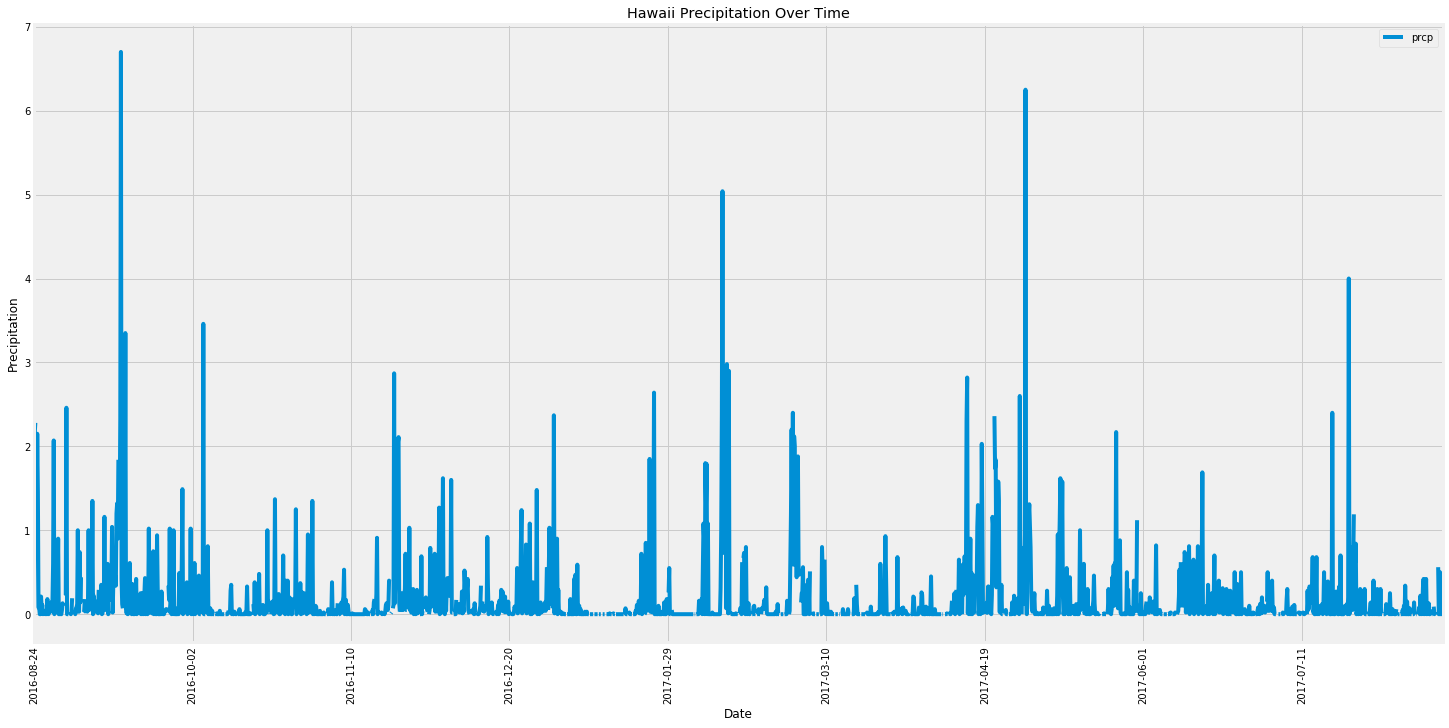

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data

#precipitation_df.plot.hist(bins = 12)
precipitation_df.plot(kind="line", figsize=(20,10))
plt.xticks(rotation="vertical")
plt.tight_layout()

plt.title("Hawaii Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean_numpy = np.mean(precipitation_df['prcp'].dropna())
print(f"The mean precipitation is {mean_numpy}")

median_numpy = np.median(precipitation_df['prcp'].dropna())
print(f"The median precipitation is {median_numpy}")

mode_scipy = sts.mode(precipitation_df['prcp'].dropna())
print(f"The mode precipitation is {mode_scipy}")

sd_numpy = np.std(precipitation_df['prcp'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")


The mean precipitation is 0.1764615384615378
The median precipitation is 0.02
The mode precipitation is ModeResult(mode=array([0.]), count=array([873]))
The population standard deviation using the NumPy module is 0.46017413403228974


In [46]:
# Use .describe to get confirmation of statistics 
precipitation_df.describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Station Analysis

Design a query to calculate the total number of stations.

Design a query to find the most active stations.

-- List the stations and observation counts in descending order.

-- Which station has the highest number of observations?


Design a query to retrieve the last 12 months of temperature observation data (tobs).

-- Filter by the station with the highest number of observations.

-- Plot the results as a histogram with bins=12.

In [27]:
# Design a query to show how many stations are available in this dataset
station_count = session.query(Station).count()
station_count

9

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [Measurement.station,
      func.count(Measurement.tobs)]
most_active = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [Measurement.station, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_data = session.query(*sel).filter(Measurement.station == "USC00519281").all()
most_active_data

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

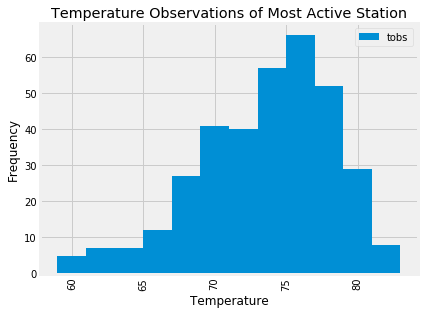

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the date and tobs data
tobs_last12 = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date > '2016-08-23').\
            filter(Measurement.station == "USC00519281").all()


# Save the query results as a Pandas DataFrame 
tobs_last12_df = pd.DataFrame(tobs_last12)


# Plot histogram
tobs_last12_df.plot.hist(bins = 12)
plt.xticks(rotation="vertical")
plt.tight_layout()

plt.title("Temperature Observations of Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Bonus exercises

Temperature Analysis I

Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [99]:
sel = [func.avg(Measurement.tobs)]

june_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06").filter(Measurement.date != "NaN").all()
june_averages

[(74.94411764705882)]

In [100]:
sel = [func.avg(Measurement.tobs)]

december_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12").filter(Measurement.date != "NaN").all()
december_averages

[(71.04152933421226)]

We use a paired t-test because we are testing temperature data for the same stations. 

In [101]:
# Paired t-test
sts.ttest_rel(june_averages, december_averages)

Ttest_relResult(statistic=array([nan]), pvalue=array([nan]))

Temperature Analysis II

The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.


Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").


Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.


Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [34]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
temps = (calc_temps('2012-04-15', '2013-04-15'))
temps

[(53.0, 72.14532208588957, 86.0)]

In [35]:
temps = list(np.ravel(temps))
temps

[53.0, 72.14532208588957, 86.0]

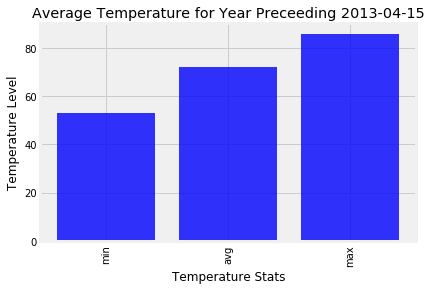

In [91]:
x = range(len(temps))
tick_locations = [value for value in x]

plt.title("Temperature Statistics for Year Preceeding 2013-04-15")
plt.xlabel("Temperature Stats")
plt.ylabel("Temperature Level")
plt.xticks(tick_locations, ["min","avg","max"], rotation="vertical")
plt.bar(x, temps, color='b', alpha=0.8, align="center")
plt.show()

In [105]:
# Calculate PTP value 
start_date = '2012-04-15'
end_date = '2013-04-15'

results = session.query(func.max(Measurement.tobs) - func.min(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

results

[(33.0)]

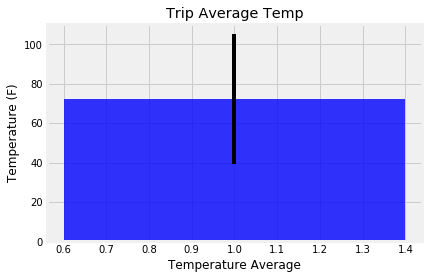

In [110]:
average = temps[1]
x=[1]

plt.title("Trip Average Temp")
plt.xlabel("Temperature Average")
plt.ylabel("Temperature (F)")
plt.bar(x, average, color='b', alpha=0.8, align="center", yerr = 33)
plt.show()

Daily Rainfall Average

Calculate the rainfall per weather station using the previous year's matching dates.


Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.


You are provided with a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.


Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.


Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.


Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [52]:
# Calculate the rainfall per weather station for previous year 
sel = [Measurement.station,
      func.sum(Measurement.tobs)]

rainfall = session.query(*sel).group_by(Measurement.station).filter(Measurement.date < '2014-04-15').filter(Measurement.date > '2013-04-15').order_by(func.sum(Measurement.tobs).desc()).all()

rainfall

[('USC00519397', 27035.0),
 ('USC00513117', 26326.0),
 ('USC00519281', 25818.0),
 ('USC00511918', 25760.0),
 ('USC00519523', 25657.0),
 ('USC00516128', 23616.0),
 ('USC00514830', 20965.0),
 ('USC00517948', 15459.0),
 ('USC00518838', 2761.0)]

In [54]:
#Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the 
#normals for each date string and append the results to a list.

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()


trip_dates = ["04-15","04-16","04-17","04-18","04-19"]

trip_daily_normals = []
for date in trip_dates:
        normals = daily_normals(date)
        trip_daily_normals.append(normals)
        
trip_daily_normals

[[(61.0, 71.79310344827586, 79.0)],
 [(62.0, 71.55357142857143, 81.0)],
 [(65.0, 71.93103448275862, 77.0)],
 [(67.0, 72.49152542372882, 77.0)],
 [(65.0, 72.42105263157895, 83.0)]]

In [68]:
trip_daily_normals = list(np.ravel(trip_daily_normals))
trip_daily_normals

[61.0,
 71.79310344827586,
 79.0,
 62.0,
 71.55357142857143,
 81.0,
 65.0,
 71.93103448275862,
 77.0,
 67.0,
 72.49152542372882,
 77.0,
 65.0,
 72.42105263157895,
 83.0]

In [81]:
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

minimums = [trip_daily_normals[0],trip_daily_normals[3], trip_daily_normals[6], trip_daily_normals[9], trip_daily_normals[12]]
averages = [trip_daily_normals[1],trip_daily_normals[4], trip_daily_normals[7], trip_daily_normals[10], trip_daily_normals[13]]
maximums = [trip_daily_normals[2],trip_daily_normals[5], trip_daily_normals[8], trip_daily_normals[11], trip_daily_normals[14]]

normals_dict = {"date":trip_dates,"minimums":minimums,"averages":averages,"maximums":maximums}
normals_df = pd.DataFrame(normals_dict)
normals_df.set_index('date', inplace=True)

normals_df 

minimums   averages  maximums
date                                
04-15      61.0  71.793103      79.0
04-16      62.0  71.553571      81.0
04-17      65.0  71.931034      77.0
04-18      67.0  72.491525      77.0
04-19      65.0  72.421053      83.0

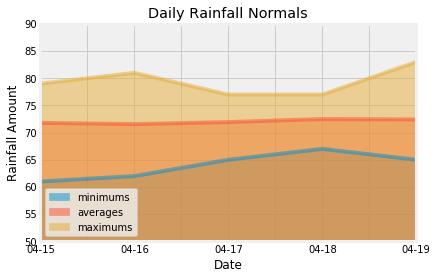

In [88]:
# Use Pandas to plot an area plot (stacked=False) for the daily normals

ax = normals_df.plot.area(stacked=False)
plt.title("Daily Rainfall Normals")
plt.xlabel("Date")
plt.ylabel("Rainfall Amount")
plt.ylim(50, 90)
plt.show()